In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("PoliticianDonationProfile.csv")
df.head()

,CID,Party,0 to 580.49,580.49 to 1526.17,1526.17 to 4012.47,4012.47 to 10549.24,over 10549.24
0,N00028958,R,5.01,54.39,34.65,5.94,0.00
1,N00027860,D,5.57,60.23,26.58,7.62,0.00
2,N00031681,R,6.79,49.32,35.24,8.65,0.00
3,N00035825,D,7.87,32.44,31.54,26.99,1.15
4,N00027509,R,3.09,59.98,31.81,5.12,0.00


## Selecting a k value
We'd like to cluster our data to view voting behavior in aggreate. We want enough clusters to effectively capture distinct groups, while still allowing us to have substantial clusters.

[274  72]
[72, 274]
[163  66 117]
[66, 117, 163]
[165  59 115   7]
[7, 59, 115, 165]
[134  23  41   7 141]
[7, 23, 41, 134, 141]
[123  38   7  92  65  21]
[7, 21, 38, 65, 92, 123]
[ 65  92  17 123   6   1  42]
[1, 6, 17, 42, 65, 92, 123]
[37 36 98 12 17 59  1 86]
[1, 12, 17, 36, 37, 59, 86, 98]
[88 25 58  1 98 35  6 25 10]
[1, 6, 10, 25, 25, 35, 58, 88, 98]
[67 16 74 12  1 86 17 46 21  6]
[1, 6, 12, 16, 17, 21, 46, 67, 74, 86]
[87 15 63 18 68 26  6 16  9  1 37]
[1, 6, 9, 15, 16, 18, 26, 37, 63, 68, 87]
[82 17 13 75 52 29  1  6  6 17 12 36]
[1, 6, 6, 12, 13, 17, 17, 29, 36, 52, 75, 82]
[36 14 52 37  1  6  6 72  4 16 76 14 12]
[1, 4, 6, 6, 12, 14, 14, 16, 36, 37, 52, 72, 76]
[71 11 13 33 36 59  6  1  4 42 17 15  6 32]
[1, 4, 6, 6, 11, 13, 15, 17, 32, 33, 36, 42, 59, 71]
[ 6 40 18 37  9 26  1 27 55 13  8 67 12  4 23]
[1, 4, 6, 8, 9, 12, 13, 18, 23, 26, 27, 37, 40, 55, 67]
[ 6 70 15 31 13 14 29 38  6 14 53  1 41  1 11  3]
[1, 1, 3, 6, 6, 11, 13, 14, 14, 15, 29, 31, 38, 41, 53, 70]
[51 15  

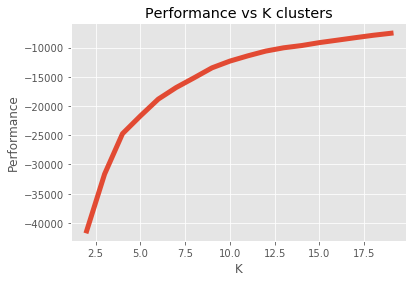

[None, None, 72.0, 66.0, 7.0, 7.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


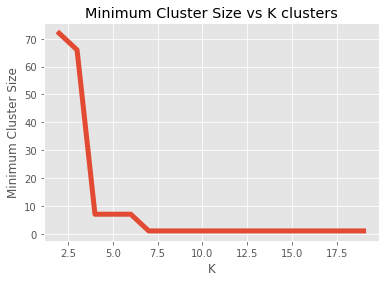

In [33]:
performance = [None, None]
min_cluster_size = [None, None]
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df[df.columns[2:]])
    unique_label, counts = np.unique(labels, return_counts=True)
    print(counts)
    print(sorted(counts))
    min_cluster_size.append(np.mean(sorted(counts)[0]))
    performance.append(kmeans.score(df[df.columns[2:]]))
plt.style.use("ggplot")
plt.plot(performance, lw=5)
plt.title("Performance vs K clusters")
plt.ylabel("Performance")
plt.xlabel("K")
plt.show()
print(min_cluster_size)
plt.plot(min_cluster_size, lw=5)
plt.title("Minimum Cluster Size vs K clusters")
plt.ylabel("Minimum Cluster Size")
plt.xlabel("K")
plt.show()

## Selecting a K value (cont)
So we see performance rising quickly as we add the first few clusters; but we also see as we get past 7 clusters, the smallest cluster size is 1. This basically means at that point we're overfitting our clusters, and it's nonsensical to compare the voting record of a single politician with that of another if our goal is to see overarching trends. In fact, we really don't get consistent substantial clusters thorughout at any value beyond 3--so this will be our selected K value.

In [34]:
kmeans = KMeans(n_clusters=3)
df['ClusterID'] = kmeans.fit_predict(df[df.columns[2:]])
df = df[['CID', 'ClusterID']]

In [ ]:
d